<a href="https://colab.research.google.com/github/Dataniel31/Proyecto1-AnalisisDe-Pel-culasySeries-de-TVenIMDB/blob/main/Proyecto1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SCI: Inteligencia Artificial - Proyecto 1
## Análisis de Películas y Series de TV en IMDb

En este proyecto, exploraremos datos de películas y series de televisión utilizando la base de datos de IMDb. Utilizaremos Jupyter Notebook para realizar análisis y visualizaciones. A continuación, se presentan los pasos principales:

1. **Carga y limpieza de datos**: Utilizaremos la librería pandas para cargar el dataset y realizar la limpieza básica de datos (manejo de valores nulos, tipo de datos).

2. **Análisis exploratorio (EDA)**: Exploraremos tendencias, distribuciones y relaciones entre variables. Algunas preguntas interesantes podrían ser:
   - ¿Qué directores tienden a generar mayores ingresos en taquilla?
   - ¿Qué actores están asociados con películas que generan mayores ingresos?
   - ¿Qué directores tienden a recibir más votos en IMDb?
   - ¿Qué actores están asociados con películas que reciben más votos?
   - ¿Qué géneros de películas son los preferidos por los actores?

3. **Visualización de datos**: Utilizaremos gráficos y visualizaciones utilizando la librería matplotlib.

In [306]:
#Importa librerias necesarias para la solucion
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



1.1 **Carga de datos**: Utilizaremos la librería pandas para cargar el dataset desde el archivo CSV descargado. Con el siguiente código:

In [307]:
#crear el dataframe.
df=pd.read_csv('imdb_top_1000.csv')

# vemos cuantas filas y columnas posee el dataframe.
print(df.shape)

#imprimimos las 5 primeras filas para observar los datos.
df.head()



(1000, 16)


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [308]:
#Eliminamos las columnas que no necesitamos
ColumnasA_eliminar= ['Poster_Link']
df = df.drop(columns=ColumnasA_eliminar)
df.columns = [
    'Titulo', 'Año de lanzamiento', 'Certificacion', 
    'Duracion', 'Genero', 'Calificacion en IMDB', 'Resumen', 
    'Puntuacion en Metacritic', 'Director', 'Actor Principal 1', 
    'Actor Principal 2', 'Actor Principal 3', 'Actor Principal 4', 
    'Numero de votos', 'Recaudacion bruta'
]


df.head()




,Titulo,Año de lanzamiento,Certificacion,Duracion,Genero,Calificacion en IMDB,Resumen,Puntuacion en Metacritic,Director,Actor Principal 1,Actor Principal 2,Actor Principal 3,Actor Principal 4,Numero de votos,Recaudacion bruta
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


1.2 **Limpieza de Datos**

En esta etapa, nos aseguraremos de que nuestros datos estén listos para el análisis. Realizaremos las siguientes tareas:

1. **Manejo de valores nulos**:
   - Identificaremos columnas con valores faltantes.
   - Decidiremos si eliminamos filas o imputamos valores para los datos faltantes.

2. **Ajuste de tipos de datos**:
   - Verificaremos que las columnas tengan los tipos de datos correctos.
   - Por ejemplo, convertiremos fechas a objetos datetime si es necesario.

In [309]:
# Obtenemos informacion de cuantos valores nulos existen por columnas y su tipo de dato
df.info()
#17-18-19 imputacion de datos 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Titulo                    1000 non-null   object 
 1   Año de lanzamiento        1000 non-null   object 
 2   Certificacion             899 non-null    object 
 3   Duracion                  1000 non-null   object 
 4   Genero                    1000 non-null   object 
 5   Calificacion en IMDB      1000 non-null   float64
 6   Resumen                   1000 non-null   object 
 7   Puntuacion en Metacritic  843 non-null    float64
 8   Director                  1000 non-null   object 
 9   Actor Principal 1         1000 non-null   object 
 10  Actor Principal 2         1000 non-null   object 
 11  Actor Principal 3         1000 non-null   object 
 12  Actor Principal 4         1000 non-null   object 
 13  Numero de votos           1000 non-null   int64  
 14  Recaudaci

# Análisis de Columnas y Tipos de Variables

En esta etapa, examinaremos las columnas del conjunto de datos y determinaremos el tipo de variable que representa cada una. A continuación, se presenta un resumen:
## Imputación de Datos

Para manejar los valores faltantes en nuestro conjunto de datos, realizaremos la imputación de datos. Este proceso nos permitirá completar los valores faltantes utilizando diferentes métodos, como la media, la mediana o el modo, dependiendo del tipo de variable.

# Cambio del tipo de dato en la columna `Año de lanzamiento`

## Objetivo
Verificar los valores de la columna  `Año de lanzamiento` utilizando el metodo unique(), para visualizar si algun valor causaria problemas al momento de la conversion del tipo de dato de `object` a `int`



In [310]:
#Vemos los valores que conforman nuestra columna Año de lanzamiento
print(df['Año de lanzamiento'].unique())

#Observamos que existe un valor PG que causaria problemas al momento de convertir los datos a int
#Imprimimos el registro que contiene PG como Año de lanzamiento
registro = df[df['Año de lanzamiento'] == 'PG']
registro


['1994' '1972' '2008' '1974' '1957' '2003' '1993' '2010' '1999' '2001'
 '1966' '2002' '1990' '1980' '1975' '2020' '2019' '2014' '1998' '1997'
 '1995' '1991' '1977' '1962' '1954' '1946' '2011' '2006' '2000' '1988'
 '1985' '1968' '1960' '1942' '1936' '1931' '2018' '2017' '2016' '2012'
 '2009' '2007' '1984' '1981' '1979' '1971' '1963' '1964' '1950' '1940'
 '2013' '2005' '2004' '1992' '1987' '1986' '1983' '1976' '1973' '1965'
 '1959' '1958' '1952' '1948' '1944' '1941' '1927' '1921' '2015' '1996'
 '1989' '1978' '1961' '1955' '1953' '1925' '1924' '1982' '1967' '1951'
 '1949' '1939' '1937' '1934' '1928' '1926' '1920' '1970' '1969' '1956'
 '1947' '1945' '1930' '1938' '1935' '1933' '1932' '1922' '1943' 'PG']


,Titulo,Año de lanzamiento,Certificacion,Duracion,Genero,Calificacion en IMDB,Resumen,Puntuacion en Metacritic,Director,Actor Principal 1,Actor Principal 2,Actor Principal 3,Actor Principal 4,Numero de votos,Recaudacion bruta
966,Apollo 13,PG,U,140 min,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,"173,837,933"


In [311]:
#Como se trata de un solo registro podemos investigar el año de estreno y modificarlo

df.loc[df['Año de lanzamiento'] == 'PG', 'Año de lanzamiento'] = '1970'
#Comprobamos la moficicacion
registro = df[df['Titulo'] == 'Apollo 13']

registro


,Titulo,Año de lanzamiento,Certificacion,Duracion,Genero,Calificacion en IMDB,Resumen,Puntuacion en Metacritic,Director,Actor Principal 1,Actor Principal 2,Actor Principal 3,Actor Principal 4,Numero de votos,Recaudacion bruta
966,Apollo 13,1970,U,140 min,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,"173,837,933"


In [312]:
#Corroboramos si no existe algun otro valor que cause problemas al convertir el tipo de dato
print(df['Año de lanzamiento'].unique())


['1994' '1972' '2008' '1974' '1957' '2003' '1993' '2010' '1999' '2001'
 '1966' '2002' '1990' '1980' '1975' '2020' '2019' '2014' '1998' '1997'
 '1995' '1991' '1977' '1962' '1954' '1946' '2011' '2006' '2000' '1988'
 '1985' '1968' '1960' '1942' '1936' '1931' '2018' '2017' '2016' '2012'
 '2009' '2007' '1984' '1981' '1979' '1971' '1963' '1964' '1950' '1940'
 '2013' '2005' '2004' '1992' '1987' '1986' '1983' '1976' '1973' '1965'
 '1959' '1958' '1952' '1948' '1944' '1941' '1927' '1921' '2015' '1996'
 '1989' '1978' '1961' '1955' '1953' '1925' '1924' '1982' '1967' '1951'
 '1949' '1939' '1937' '1934' '1928' '1926' '1920' '1970' '1969' '1956'
 '1947' '1945' '1930' '1938' '1935' '1933' '1932' '1922' '1943']


In [313]:
# Cambiamos el tipo de dato de object a tipo entero

df['Año de lanzamiento'] = df['Año de lanzamiento'].astype(int)

df['Año de lanzamiento']

0      1994
1      1972
2      2008
3      1974
4      1957
       ... 
995    1961
996    1956
997    1953
998    1944
999    1935
Name: Año de lanzamiento, Length: 1000, dtype: int64

# Imputación de Valores Nulos en la Columna `Certificación`

## Objetivo
Imputar los valores nulos en la columna `Certificación` utilizando la moda, es decir, el valor más frecuente en esta columna. Esto se hace para evitar la pérdida de información y mantener la consistencia de los datos.


In [314]:

print("Valores nulos antes de la imputación:")
print(df['Certificacion'].isnull().sum())

moda_certificacion = df['Certificacion'].mode()[0]

print(f"Moda utilizada para la imputación: {moda_certificacion}")

df['Certificacion'] = df['Certificacion'].fillna(moda_certificacion)


print("Valores nulos después de la imputación:")
print(df['Certificacion'].isnull().sum())

df['Certificacion']



Valores nulos antes de la imputación:
101
Moda utilizada para la imputación: U
Valores nulos después de la imputación:
0


0           A
1           A
2          UA
3           A
4           U
        ...  
995         A
996         G
997    Passed
998         U
999         U
Name: Certificacion, Length: 1000, dtype: object


# Cambio del tipo de dato en la columna `Duración`

## Objetivo
Verificar los valores de la columna  `Duración` utilizando el metodo unique(), para visualizar si algun valor causaria problemas al momento de la conversion del tipo de dato de `object` a `int`






In [315]:
print(df['Duracion'].unique())
df['Duracion'] = df['Duracion'].str.replace(' min', '').astype(int)


['142 min' '175 min' '152 min' '202 min' '96 min' '201 min' '154 min'
 '195 min' '148 min' '139 min' '178 min' '161 min' '179 min' '136 min'
 '146 min' '124 min' '133 min' '160 min' '132 min' '153 min' '169 min'
 '130 min' '125 min' '189 min' '116 min' '127 min' '118 min' '121 min'
 '207 min' '122 min' '106 min' '112 min' '151 min' '150 min' '155 min'
 '119 min' '110 min' '88 min' '137 min' '89 min' '165 min' '109 min'
 '102 min' '87 min' '126 min' '147 min' '117 min' '181 min' '149 min'
 '105 min' '164 min' '170 min' '98 min' '101 min' '113 min' '134 min'
 '229 min' '115 min' '143 min' '95 min' '104 min' '123 min' '131 min'
 '108 min' '81 min' '99 min' '114 min' '129 min' '228 min' '128 min'
 '103 min' '107 min' '68 min' '138 min' '156 min' '167 min' '163 min'
 '186 min' '321 min' '135 min' '140 min' '180 min' '158 min' '210 min'
 '86 min' '162 min' '177 min' '204 min' '91 min' '172 min' '45 min'
 '145 min' '100 min' '196 min' '93 min' '120 min' '92 min' '144 min'
 '80 min' '183 min' 

In [316]:
print(df['Duracion'].unique())

[142 175 152 202  96 201 154 195 148 139 178 161 179 136 146 124 133 160
 132 153 169 130 125 189 116 127 118 121 207 122 106 112 151 150 155 119
 110  88 137  89 165 109 102  87 126 147 117 181 149 105 164 170  98 101
 113 134 229 115 143  95 104 123 131 108  81  99 114 129 228 128 103 107
  68 138 156 167 163 186 321 135 140 180 158 210  86 162 177 204  91 172
  45 145 100 196  93 120  92 144  80 183 111 141 224 171 188  94 185  85
 205 212 238  72  67  76 159  83  90  84 191 197 174  97  75 157 209  82
 220  64 184 168 166 192 194 193  69  70 242  79  71  78]


# Imputación de Valores Nulos en la Columna `Puntuación en Metacritic`

## Objetivo
Imputar los valores nulos en la columna `Puntuación en Metacritic` utilizando la mediana. La mediana es una medida robusta que no se ve afectada por valores atípicos, lo que la hace adecuada para este tipo de datos.


In [317]:
# Verificar los valores nulos antes de la imputación
print("Valores nulos antes de la imputación:")
print(df['Puntuacion en Metacritic'].isnull().sum())

# Imputar valores nulos en la columna 'Puntuación en Metacritic' con la mediana
median_puntuacionM = df['Puntuacion en Metacritic'].median()
df['Puntuacion en Metacritic'] = df['Puntuacion en Metacritic'].fillna(median_puntuacionM)

# Verificar los valores nulos después de la imputación
print("Valores nulos después de la imputación:")
print(df['Puntuacion en Metacritic'].isnull().sum())

# Mostrar la mediana utilizada para la imputación
print(f"Mediana utilizada para la imputación: {median_puntuacionM}")

print(df['Puntuacion en Metacritic'])

Valores nulos antes de la imputación:
157
Valores nulos después de la imputación:
0
Mediana utilizada para la imputación: 79.0
0       80.0
1      100.0
2       84.0
3       90.0
4       96.0
       ...  
995     76.0
996     84.0
997     85.0
998     78.0
999     93.0
Name: Puntuacion en Metacritic, Length: 1000, dtype: float64


# Conversión e Imputación de Valores en la Columna `Recaudación bruta`

## Objetivo
Convertir la columna `Recaudación bruta` de tipo `object` a `float` para representar adecuadamente los valores monetarios y luego imputar los valores nulos utilizando la mediana. Esto es esencial para garantizar que los datos sean consistentes y adecuados para el análisis.


In [318]:
print(df['Recaudacion bruta'].unique())
df['Recaudacion bruta'] = pd.to_numeric(df['Recaudacion bruta'].str.replace(',', ''), errors='coerce')

['28,341,469' '134,966,411' '534,858,444' '57,300,000' '4,360,000'
 '377,845,905' '107,928,762' '96,898,818' '292,576,195' '37,030,102'
 '315,544,750' '330,252,182' '6,100,000' '342,551,365' '171,479,930'
 '46,836,394' '290,475,067' '112,000,000' nan '53,367,844' '188,020,017'
 '7,563,397' '10,055,859' '216,540,909' '136,801,374' '57,598,247'
 '100,125,643' '130,742,922' '322,740,140' '269,061' '335,451,311'
 '13,092,000' '13,182,281' '53,089,891' '132,384,315' '32,572,577'
 '187,705,427' '6,719,864' '23,341,568' '19,501,238' '422,783,777'
 '204,843,350' '11,990,401' '210,609,762' '5,321,508' '32,000,000'
 '1,024,560' '163,245' '19,181' '1,661,096' '5,017,246' '12,391,761'
 '190,241,310' '858,373,000' '678,815,482' '209,726,015' '162,805,434'
 '448,139,099' '6,532,908' '1,223,869' '223,808,164' '11,286,112'
 '707,481' '25,544,867' '2,375,308' '248,159,971' '44,017,374'
 '83,471,511' '78,900,000' '275,902' '8,175,000' '36,764,313' '288,475'
 '159,227,644' '1,373,943' '687,185' '7,098,49

In [319]:
print(df['Recaudacion bruta'].unique())


[2.83414690e+07 1.34966411e+08 5.34858444e+08 5.73000000e+07
 4.36000000e+06 3.77845905e+08 1.07928762e+08 9.68988180e+07
 2.92576195e+08 3.70301020e+07 3.15544750e+08 3.30252182e+08
 6.10000000e+06 3.42551365e+08 1.71479930e+08 4.68363940e+07
 2.90475067e+08 1.12000000e+08            nan 5.33678440e+07
 1.88020017e+08 7.56339700e+06 1.00558590e+07 2.16540909e+08
 1.36801374e+08 5.75982470e+07 1.00125643e+08 1.30742922e+08
 3.22740140e+08 2.69061000e+05 3.35451311e+08 1.30920000e+07
 1.31822810e+07 5.30898910e+07 1.32384315e+08 3.25725770e+07
 1.87705427e+08 6.71986400e+06 2.33415680e+07 1.95012380e+07
 4.22783777e+08 2.04843350e+08 1.19904010e+07 2.10609762e+08
 5.32150800e+06 3.20000000e+07 1.02456000e+06 1.63245000e+05
 1.91810000e+04 1.66109600e+06 5.01724600e+06 1.23917610e+07
 1.90241310e+08 8.58373000e+08 6.78815482e+08 2.09726015e+08
 1.62805434e+08 4.48139099e+08 6.53290800e+06 1.22386900e+06
 2.23808164e+08 1.12861120e+07 7.07481000e+05 2.55448670e+07
 2.37530800e+06 2.481599

In [320]:
# Imputar valores nulos en la columna 'Recaudación bruta' con la mediana
medianda_recaudacion = df['Recaudacion bruta'].median()
df['Recaudacion bruta'] = df['Recaudacion bruta'].fillna(medianda_recaudacion)

# Verificar los valores nulos después de la imputación
print("Valores nulos después de la imputación:")
print(df['Recaudacion bruta'].isnull().sum())

# Mostrar la mediana utilizada para la imputación
print(f"Mediana utilizada para la imputación: {medianda_recaudacion}")

Valores nulos después de la imputación:
0
Mediana utilizada para la imputación: 23530892.0


In [321]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Titulo                    1000 non-null   object 
 1   Año de lanzamiento        1000 non-null   int64  
 2   Certificacion             1000 non-null   object 
 3   Duracion                  1000 non-null   int64  
 4   Genero                    1000 non-null   object 
 5   Calificacion en IMDB      1000 non-null   float64
 6   Resumen                   1000 non-null   object 
 7   Puntuacion en Metacritic  1000 non-null   float64
 8   Director                  1000 non-null   object 
 9   Actor Principal 1         1000 non-null   object 
 10  Actor Principal 2         1000 non-null   object 
 11  Actor Principal 3         1000 non-null   object 
 12  Actor Principal 4         1000 non-null   object 
 13  Numero de votos           1000 non-null   int64  
 14  Recaudaci

# Exploración de Datos (EDA)

En esta sección se presenta un análisis exploratorio de los datos con varios gráficos y visualizaciones para entender mejor las características del conjunto de datos de películas.


In [322]:
df.head()

,Titulo,Año de lanzamiento,Certificacion,Duracion,Genero,Calificacion en IMDB,Resumen,Puntuacion en Metacritic,Director,Actor Principal 1,Actor Principal 2,Actor Principal 3,Actor Principal 4,Numero de votos,Recaudacion bruta
0,The Shawshank Redemption,1994,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0


In [323]:
df.describe()

,Año de lanzamiento,Duracion,Calificacion en IMDB,Puntuacion en Metacritic,Numero de votos,Recaudacion bruta
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03
mean,1991.196000,122.891000,7.949300,78.133000,2.736929e+05,6.051360e+07
std,23.295026,28.093671,0.275491,11.368225,3.273727e+05,1.014192e+08
min,1920.000000,45.000000,7.600000,28.000000,2.508800e+04,1.305000e+03
25%,1976.000000,103.000000,7.700000,72.000000,5.552625e+04,5.012919e+06
50%,1999.000000,119.000000,7.900000,79.000000,1.385485e+05,2.353089e+07
75%,2009.000000,137.000000,8.100000,85.250000,3.741612e+05,6.153989e+07
max,2020.000000,321.000000,9.300000,100.000000,2.343110e+06,9.366622e+08


## Gráfico 1 - Distribución de Años de Lanzamiento

A continuación, se muestra un gráfico que ilustra la distribución de los años de lanzamiento de las películas en el conjunto de datos.


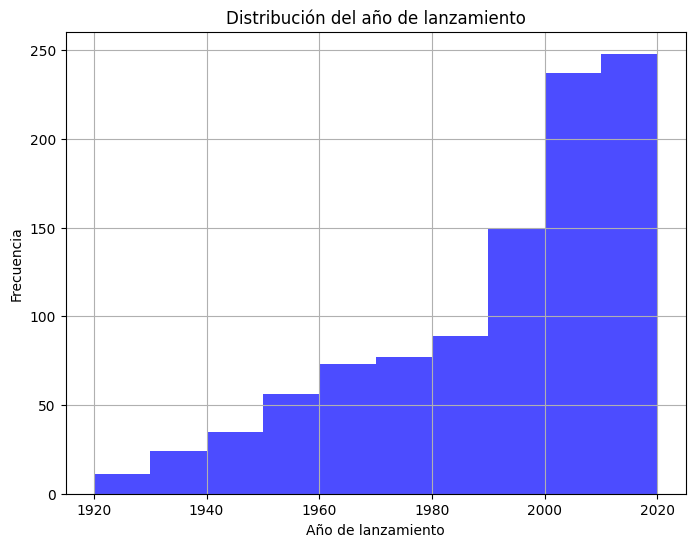

In [324]:
# hisograma de distribucion del año de lanazmiento
plt.figure(figsize=(8, 6))
plt.hist(df['Año de lanzamiento'], bins=10, alpha=0.7, color='blue')
plt.title('Distribución del año de lanzamiento')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

## Gráfico 2 - Distribución de Duración

Este gráfico presenta la distribución de la duración de las películas.


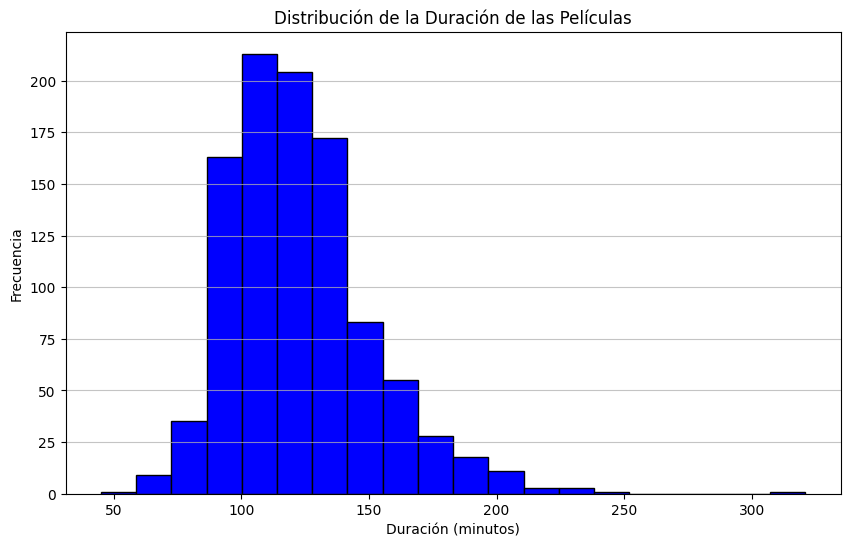

In [325]:
# distribucion de duracion de las peliculas
plt.figure(figsize=(10, 6))
plt.hist(df['Duracion'], bins=20, color='blue', edgecolor='black')
plt.title('Distribución de la Duración de las Películas')
plt.xlabel('Duración (minutos)')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

## Gráfico 3 - Distribución de Calificación en IMDB

Aquí se muestra un gráfico que representa la distribución de las calificaciones en IMDB para las películas.


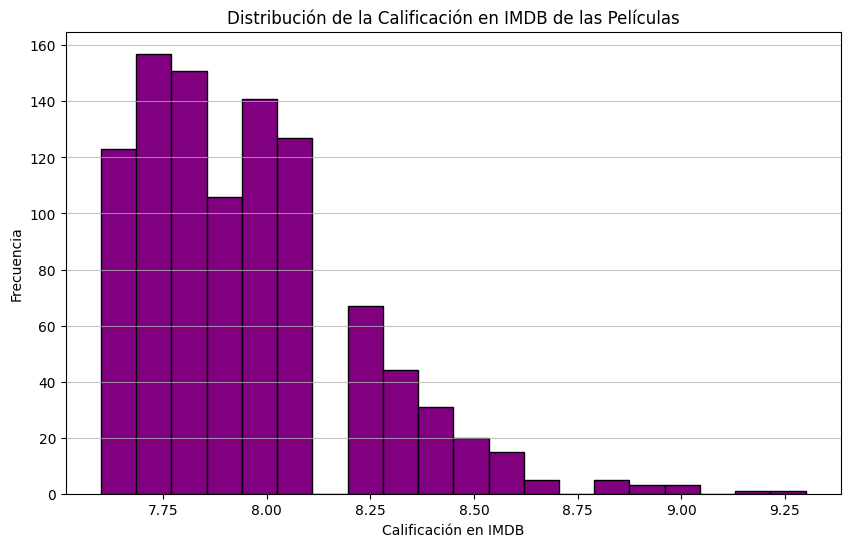

In [326]:
# grafico de distribucion de la calificacion en IMDB para las peliculas
plt.figure(figsize=(10, 6))
plt.hist(df['Calificacion en IMDB'], bins=20, color='purple', edgecolor='black')
plt.title('Distribución de la Calificación en IMDB de las Películas')
plt.xlabel('Calificación en IMDB')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

## Gráfico 4 - Distribución de Géneros de las Películas

El gráfico siguiente muestra la distribución de los géneros de las películas en el conjunto de datos.


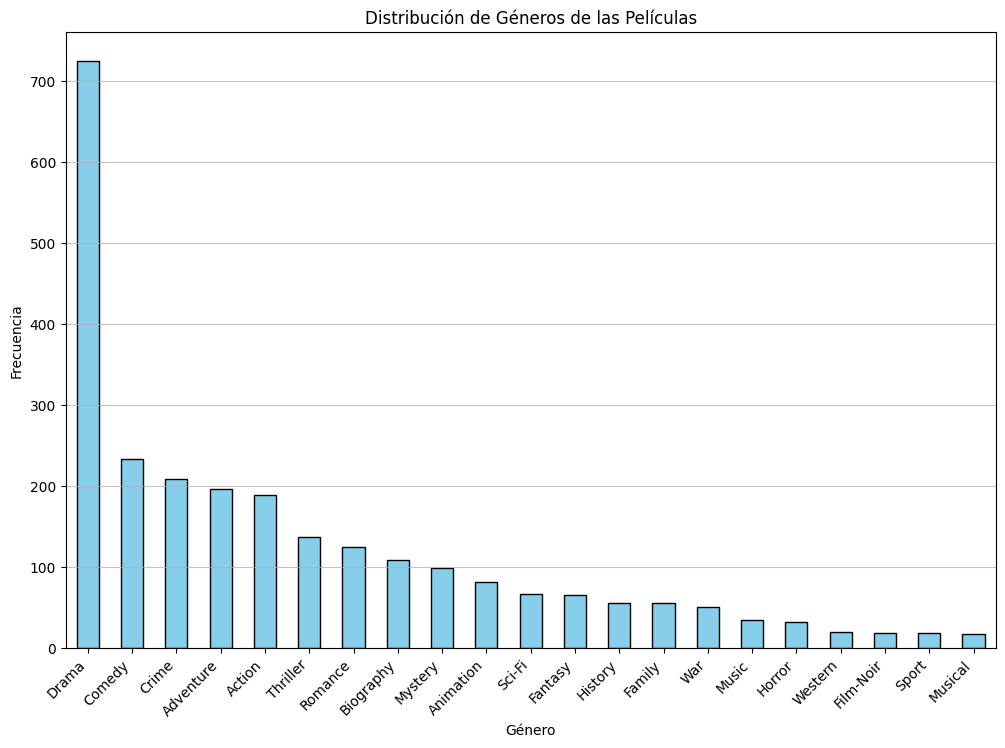

In [327]:
#realiazmos una columna, separando valores como (drama, comedy)
generos_separados = df['Genero'].str.split(', ').explode()
frecuencia_generos = generos_separados.value_counts()

# grafico de barras
plt.figure(figsize=(12, 8))
frecuencia_generos.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribución de Géneros de las Películas')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.75)
plt.show()

## Gráfico 5 - Top 20 Actores Más Frecuentes

Este gráfico muestra los 20 actores más frecuentes en el conjunto de datos.


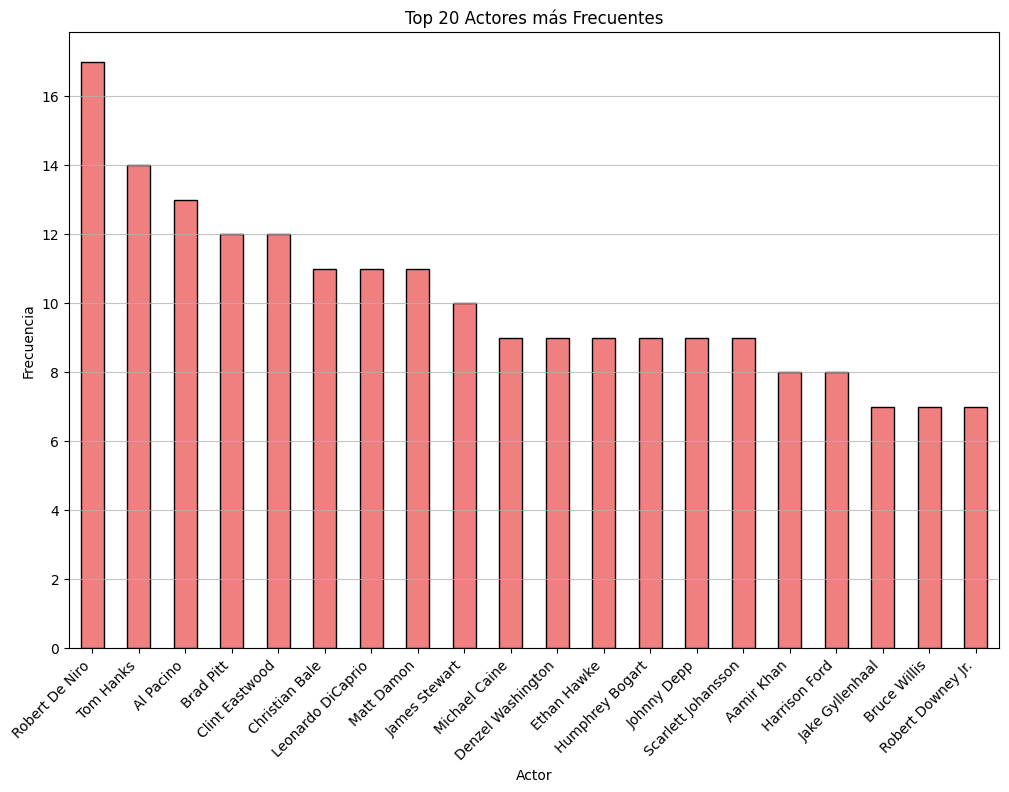

In [328]:
# unir todos los actores en una sola columna
todos_los_actores = pd.concat([df['Actor Principal 1'], df['Actor Principal 2'], df['Actor Principal 3'], df['Actor Principal 4']])

# contar la participacion de cada actor en las distintas peliculas
frecuencia_actores = todos_los_actores.value_counts()

# Seleccionar los top 20 actores mas frecuentes
top_20_actores = frecuencia_actores.head(20)

# gráfico de barras de los actores mas frecuentes
plt.figure(figsize=(12, 8))
top_20_actores.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Top 20 Actores más Frecuentes')
plt.xlabel('Actor')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.75)
plt.show()

## Gráfico 6 - Películas Más Taquilleras

A continuación, se presenta un gráfico con las películas más taquilleras según la recaudación bruta.


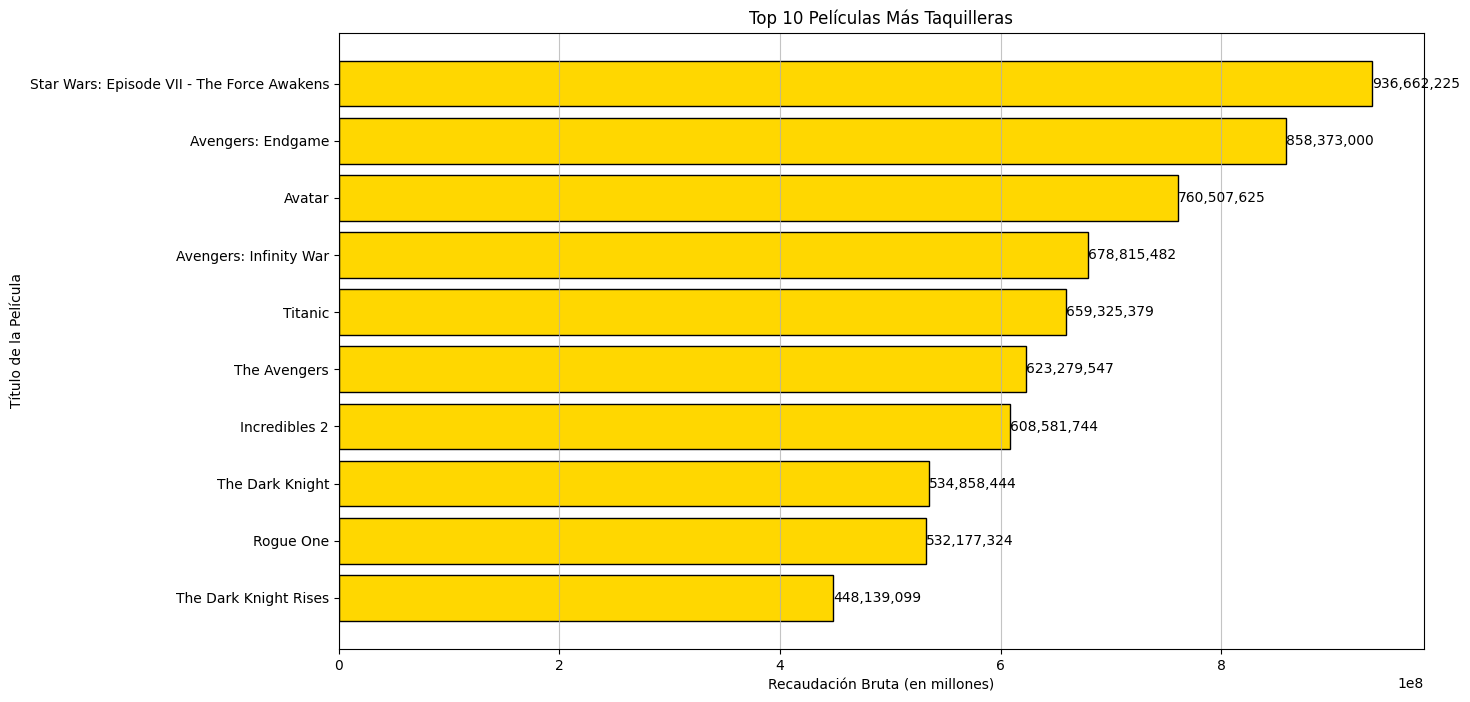

In [329]:
# Ordenar el df por recaudacion bruta en orden descendente
peliculas_mas_taquilleras = df.sort_values(by='Recaudacion bruta', ascending=False).head(10)

# grafico de barras horizontal de las peliculas mas taquilleras
plt.figure(figsize=(14, 8))
bars = plt.barh(peliculas_mas_taquilleras['Titulo'], peliculas_mas_taquilleras['Recaudacion bruta'], color='gold', edgecolor='black')

# valores en las columnas
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:,.0f}', 
             va='center', ha='left', fontsize=10, color='black')
# Invertir el eje Y para que la pelicula con mayor recaudacion este arriba
plt.gca().invert_yaxis()  
plt.title('Top 10 Películas Más Taquilleras')
plt.xlabel('Recaudación Bruta (en millones)')
plt.ylabel('Título de la Película')
plt.grid(axis='x', alpha=0.75)
plt.show()

# Preguntas

## Análisis de la Recaudación Bruta de una Película vs. Directores

Este análisis explora cómo la recaudación bruta de una película se relaciona con el director. El objetivo es identificar qué directores tienden a generar mayores ingresos en taquilla.

**Pregunta 1:** ¿Qué directores tienden a generar mayores ingresos en taquilla?


Top 10 Directores con Mayor Recaudación Bruta Total:
              Director  Recaudacion bruta Recaudacion bruta (Millones)
470   Steven Spielberg       2.478133e+09                     2,478.13
36       Anthony Russo       2.205039e+09                     2,205.04
83   Christopher Nolan       1.937454e+09                     1,937.45
202      James Cameron       1.748237e+09                     1,748.24
383      Peter Jackson       1.597312e+09                     1,597.31
195        J.J. Abrams       1.423171e+09                     1,423.17
58           Brad Bird       1.099628e+09                     1,099.63
426    Robert Zemeckis       1.049446e+09                     1,049.45
107        David Yates       9.789537e+08                       978.95
380        Pete Docter       9.629130e+08                       962.91


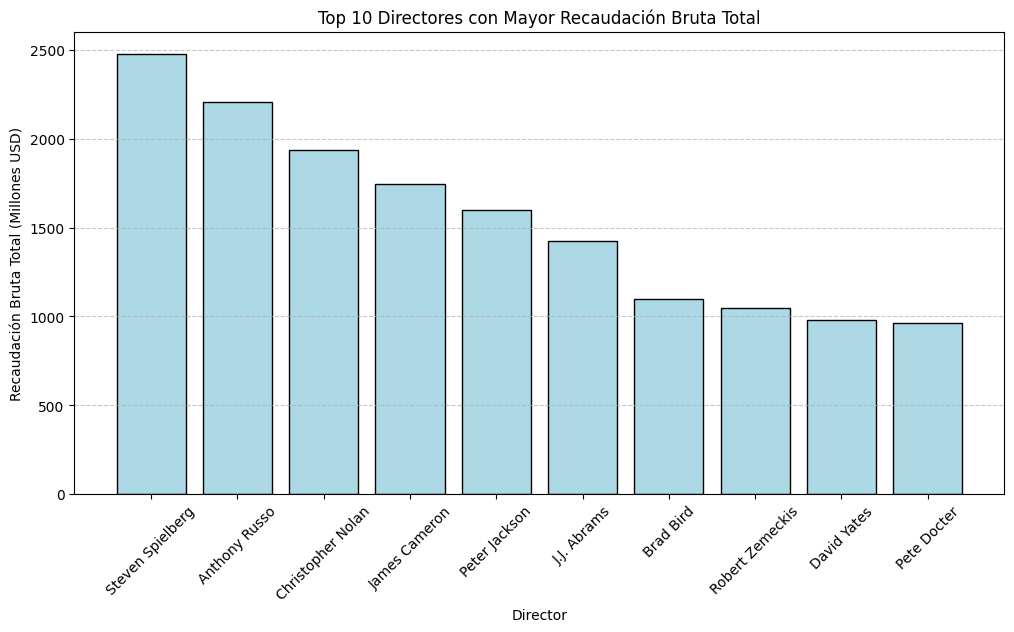

In [330]:
# Agrupar por director y calcular la recaudacion bruta total
recaudacion_por_director = df.groupby('Director')['Recaudacion bruta'].sum().reset_index()

# Ordenar por recaudacion bruta total en orden descendente
directores_exitosos = recaudacion_por_director.sort_values(by='Recaudacion bruta', ascending=False)

# Convertir la recaudacion bruta a millones y formatear
directores_exitosos['Recaudacion bruta (Millones)'] = directores_exitosos['Recaudacion bruta'] / 1_000_000
directores_exitosos['Recaudacion bruta (Millones)'] = directores_exitosos['Recaudacion bruta (Millones)'].apply(lambda x: "{:,.2f}".format(x))

# Mostrar los 10 directores con mayor recaudacion bruta total
print("Top 10 Directores con Mayor Recaudación Bruta Total:")
print(directores_exitosos.head(10))

# Seleccionar los 10 directores con mayor recaudacion bruta total
top_10_directores = directores_exitosos.head(10).copy()  

# Convertir la columna 'Recaudacion bruta (Millones)' a float para el gráfico
top_10_directores['Recaudacion bruta (Millones)'] = top_10_directores['Recaudacion bruta (Millones)'].str.replace(',', '').astype(float)

# grafico de barras de la recaudación bruta total en millones por director
plt.figure(figsize=(12, 6))
plt.bar(top_10_directores['Director'], top_10_directores['Recaudacion bruta (Millones)'], color='lightblue', edgecolor='black')
plt.title('Top 10 Directores con Mayor Recaudación Bruta Total')
plt.xlabel('Director')
plt.ylabel('Recaudación Bruta Total (Millones USD)')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

## Análisis de la Recaudación Bruta de una Película vs. Diferentes Actores

En este análisis, se examina cómo la recaudación bruta de una película está asociada con los diferentes actores que participan en ella. Se busca determinar qué actores están asociados con películas que generan mayores ingresos.

**Pregunta 2:** ¿Qué actores están asociados con películas que generan mayores ingresos?


Top 10 Actores Asociados con Mayor Recaudación Bruta Total:
                  Actor  Recaudacion bruta Recaudacion bruta (Millones)
2137  Robert Downey Jr.       3.129073e+09                     3,129.07
2498          Tom Hanks       2.903565e+09                     2,903.56
427         Chris Evans       2.339664e+09                     2,339.66
1205          Joe Russo       2.205039e+09                     2,205.04
1655       Mark Ruffalo       2.081926e+09                     2,081.93
1511  Leonardo DiCaprio       2.049297e+09                     2,049.30
991        Ian McKellen       1.869869e+09                     1,869.87
2202       Rupert Grint       1.835901e+09                     1,835.90
515    Daniel Radcliffe       1.835901e+09                     1,835.90
1696         Matt Damon       1.728542e+09                     1,728.54


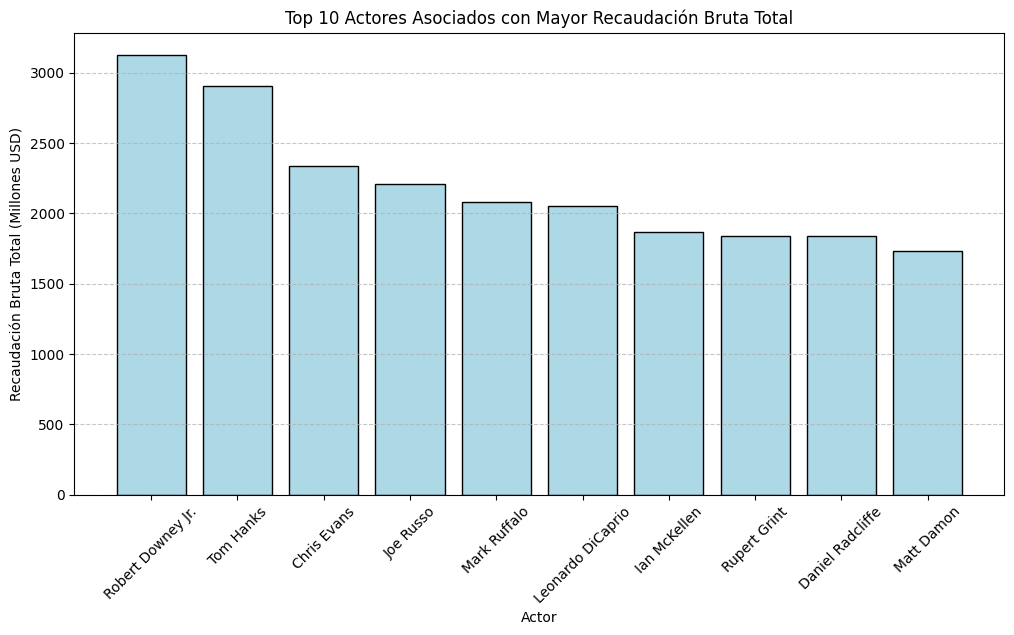

In [331]:
# Transformar el df para que cada actor tenga una fila
actores_columnas = ['Actor Principal 1', 'Actor Principal 2', 'Actor Principal 3', 'Actor Principal 4']
actores_df = df.melt(id_vars=['Recaudacion bruta'], value_vars=actores_columnas, var_name='Rol', value_name='Actor')

# agrupar por actor y calcular la recaudacion bruta total
recaudacion_por_actor = actores_df.groupby('Actor')['Recaudacion bruta'].sum().reset_index()

# ordenar por recaudacion bruta total en orden descendente
actores_mayores_ingresos = recaudacion_por_actor.sort_values(by='Recaudacion bruta', ascending=False)

# Convertir la recaudacion bruta a millones y formatear
actores_mayores_ingresos['Recaudacion bruta (Millones)'] = actores_mayores_ingresos['Recaudacion bruta'] / 1_000_000
actores_mayores_ingresos['Recaudacion bruta (Millones)'] = actores_mayores_ingresos['Recaudacion bruta (Millones)'].apply(lambda x: "{:,.2f}".format(x))

# enseñar los 10 actores con mayor recaudacion bruta total
print("Top 10 Actores Asociados con Mayor Recaudación Bruta Total:")
print(actores_mayores_ingresos.head(10))

# obtener los 10 actores con mayor recaudacion bruta total
top_10_actores = actores_mayores_ingresos.head(10).copy()  # Usar .copy() para evitar el SettingWithCopyWarning

# Convertir la columna 'recaudacion bruta (Millones)' a float para el gráfico
top_10_actores['Recaudacion bruta (Millones)'] = top_10_actores['Recaudacion bruta (Millones)'].str.replace(',', '').astype(float)

# Gráfico de barras de la recaudación bruta total en millones por actor
plt.figure(figsize=(12, 6))
plt.bar(top_10_actores['Actor'], top_10_actores['Recaudacion bruta (Millones)'], color='lightblue', edgecolor='black')
plt.title('Top 10 Actores Asociados con Mayor Recaudación Bruta Total')
plt.xlabel('Actor')
plt.ylabel('Recaudación Bruta Total (Millones USD)')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

## Análisis del Número de Votos de una Película vs. Directores

Este análisis investiga la relación entre el número de votos que recibe una película en IMDB y el director de la película. El objetivo es identificar qué directores tienden a recibir más votos.

**Pregunta 3:** ¿Qué directores tienden a recibir más votos en IMDB?


Top 10 Directores con Mayor Número Total de Votos:
              Director Numero de votos
83   Christopher Nolan      11,578,345
391  Quentin Tarantino       8,123,208
470   Steven Spielberg       7,817,166
100      David Fincher       6,607,859
313    Martin Scorsese       6,513,530
383      Peter Jackson       6,148,579
202      James Cameron       4,613,107
411       Ridley Scott       4,339,890
426    Robert Zemeckis       4,055,464
463    Stanley Kubrick       3,919,254


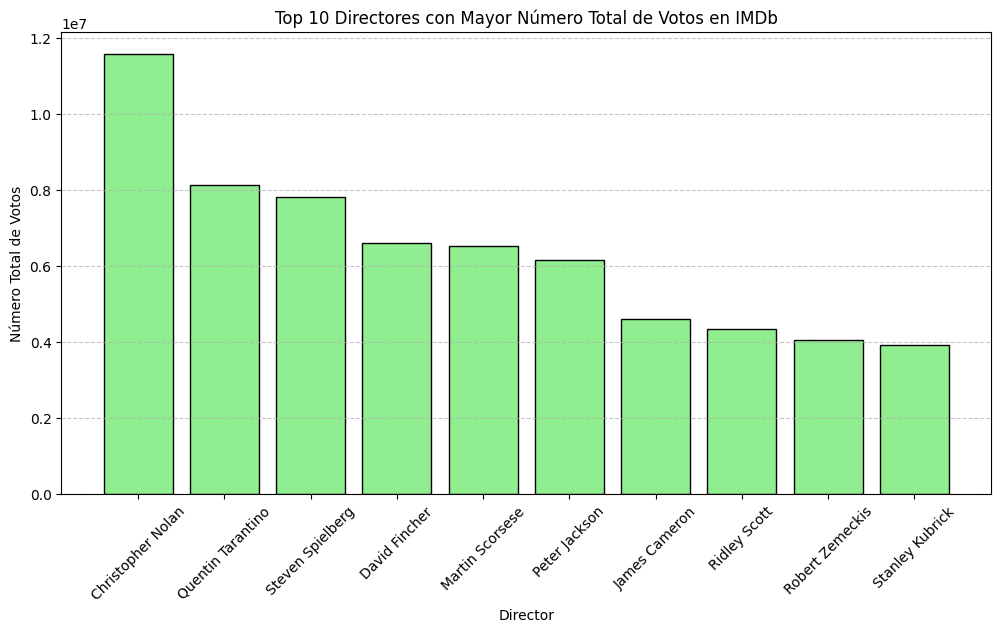

In [332]:
votos_por_director = df.groupby('Director')['Numero de votos'].sum().reset_index()

# ordenra por numero total de votos en orden descendente
directores_mas_votados = votos_por_director.sort_values(by='Numero de votos', ascending=False)

# Convertir el numero total de votos a formato más legible
directores_mas_votados['Numero de votos'] = directores_mas_votados['Numero de votos'].apply(lambda x: "{:,}".format(x))

# Mostrar los 10 directores con mas votos
print("Top 10 Directores con Mayor Número Total de Votos:")
print(directores_mas_votados.head(10))

# Seleccionar los 10 directores con mas votos
top_10_directores_votados = directores_mas_votados.head(10).copy()  # Usar .copy() para evitar el SettingWithCopyWarning

# transformar la columna 'Numero de votos' a int para el gráfico
top_10_directores_votados['Numero de votos'] = top_10_directores_votados['Numero de votos'].str.replace(',', '').astype(int)

# grafico dde barras del numeroo total de votos por director
plt.figure(figsize=(12, 6))
plt.bar(top_10_directores_votados['Director'], top_10_directores_votados['Numero de votos'], color='lightgreen', edgecolor='black')
plt.title('Top 10 Directores con Mayor Número Total de Votos en IMDb')
plt.xlabel('Director')
plt.ylabel('Número Total de Votos')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

## Análisis del Número de Votos de una Película vs. Diferentes Actores

En este análisis, se explora cómo el número de votos de una película está relacionado con los actores que participan en ella. Se busca identificar qué actores están asociados con películas que reciben más votos.

**Pregunta 4:** ¿Qué actores están asociados con películas que reciben más votos?


Actor
Leonardo DiCaprio    10.782195
Tom Hanks             9.374159
Brad Pitt             9.144728
Christian Bale        8.565922
Robert De Niro        7.787234
Ian McKellen          7.063378
Matt Damon            6.840383
Harrison Ford         6.341070
Al Pacino             6.098413
Michael Caine         6.064485
Name: Numero de votos, dtype: float64


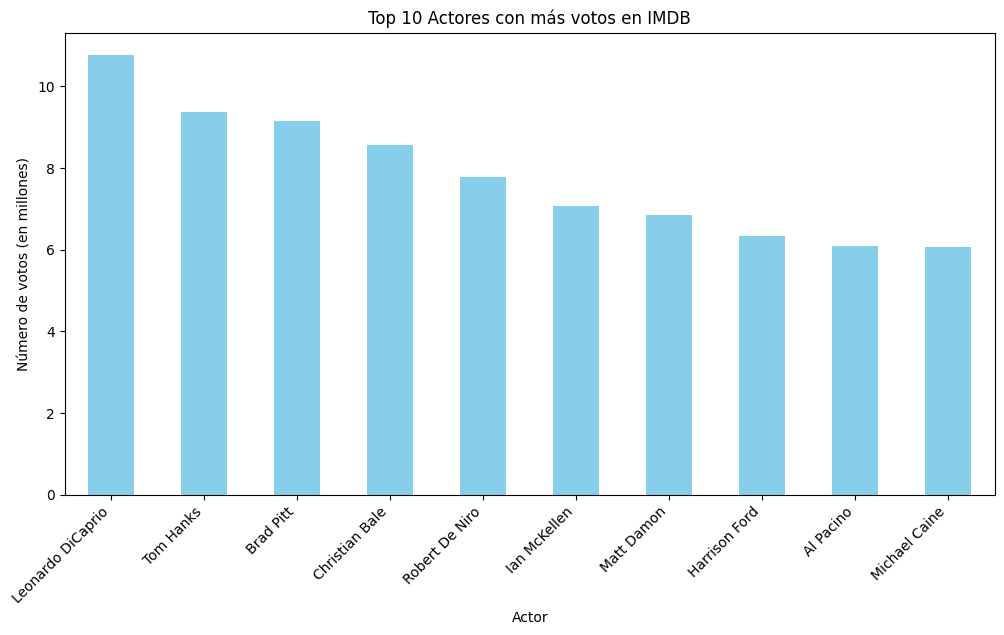

In [333]:
# agrupar las columnas de actores en una sola columna
actores = pd.melt(df, id_vars=['Titulo', 'Numero de votos'], value_vars=['Actor Principal 1', 'Actor Principal 2', 'Actor Principal 3', 'Actor Principal 4'], var_name='Tipo', value_name='Actor')

# agrupar por actor y calcular la suma del numero de votos
votos_por_actor = actores.groupby('Actor')['Numero de votos'].sum()

# Convertir los votos a millones
votos_por_actor_millones = votos_por_actor / 1e6

# Ordenar y seleccionar los 10 actores con más votos en millones
top_10_actores = votos_por_actor_millones.sort_values(ascending=False).head(10)
print(top_10_actores)

# diseñar el grafico de barras
plt.figure(figsize=(12, 6))
ax = top_10_actores.plot(kind='bar', color='skyblue')
plt.title('Top 10 Actores con más votos en IMDB')
plt.xlabel('Actor')
plt.ylabel('Número de votos (en millones)')
plt.xticks(rotation=45, ha='right')


plt.show()

## Preferencia de Géneros de las Películas por Parte de los Actores

Este análisis examina las preferencias de los actores por diferentes géneros cinematográficos. Se analiza qué géneros de películas son los que los actores prefieren.

**Pregunta 5:** ¿Qué géneros de películas son los que los actores prefieren?

Top 10 Géneros con Más Actores Participantes:
       Genero  Cantidad de Actores
6       Drama                 2086
4      Comedy                  775
5       Crime                  686
1   Adventure                  609
0      Action                  586
18   Thriller                  480
15    Romance                  449
3   Biography                  379
14    Mystery                  357
2   Animation                  301


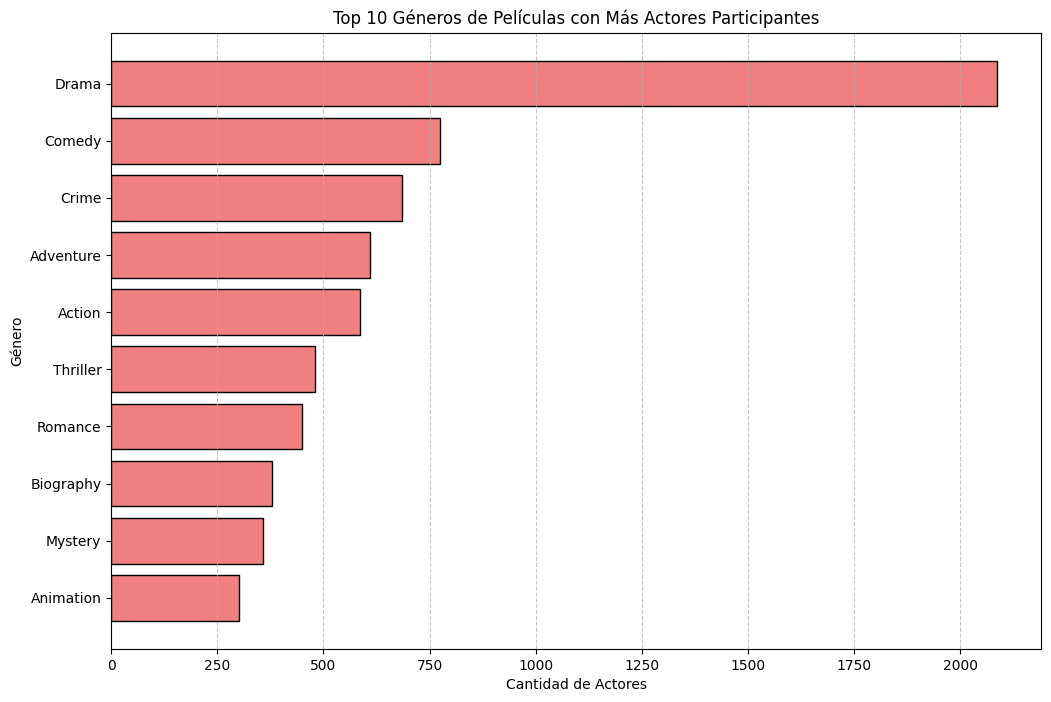

In [334]:
# Unir las columnas de actores en una sola columna
actores = pd.melt(df, id_vars=['Titulo', 'Genero'], 
                   value_vars=['Actor Principal 1', 'Actor Principal 2', 'Actor Principal 3', 'Actor Principal 4'], 
                   var_name='Tipo', value_name='Actor')

# separa multiples generos en diferentes filas
actores['Genero'] = actores['Genero'].str.split(', ').apply(lambda x: [g.strip() for g in x])
actores = actores.explode('Genero') 

# contar la cantidad de actores únicos por género
actores_por_genero = actores.groupby('Genero')['Actor'].nunique().reset_index(name='Cantidad de Actores')

# ordenar por la cantidad de actores en orden descendente y seleccionar el top 10
top_10_generos = actores_por_genero.sort_values(by='Cantidad de Actores', ascending=False).head(10)

# Mostrar el top 10 géneros
print("Top 10 Géneros con Más Actores Participantes:")
print(top_10_generos)

# Graficar el top 10 géneros y la cantidad de actores
plt.figure(figsize=(12, 8))
plt.barh(top_10_generos['Genero'], top_10_generos['Cantidad de Actores'], color='lightcoral', edgecolor='black')
plt.title('Top 10 Géneros de Películas con Más Actores Participantes')
plt.xlabel('Cantidad de Actores')
plt.ylabel('Género')
plt.gca().invert_yaxis()  # Invertir el eje Y para que el género con más actores esté arriba
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Regresion lineal multiple


# Preprocesamiento de Datos para la Regresión Lineal

En esta sección, realizaremos la selección de las columnas relevantes, aplicaremos el one-hot encoding para las variables categóricas y normalizaremos tanto las características como la variable objetivo para preparar los datos para el entrenamiento del modelo de regresión lineal.

## 1. Seleccionar las Columnas Relevantes

Primero, seleccionamos las columnas de nuestro DataFrame que consideramos importantes para el modelo de regresión. En este caso, elegimos las columnas relacionadas con la característica `Número de votos`, `Duración`, `Puntuación en Metacritic`, `Recaudación bruta`, y la variable objetivo `Calificación en IMDB`.

```python
data = df[['Numero de votos', 'Duracion', 'Puntuacion en Metacritic', 'Recaudacion bruta', 'Calificacion en IMDB']]


In [335]:
# Seleccionar las columnas  para nuestra regresion
data = df[['Numero de votos', 'Duracion', 'Puntuacion en Metacritic', 'Recaudacion bruta', 'Calificacion en IMDB']]

# Convertir variables categoricas a variables dummy (variables ficticias)
data = pd.get_dummies(data, drop_first=True)

# Extraer las características y la variable objetivo
X = data.drop('Calificacion en IMDB', axis=1).values
Y = data['Calificacion en IMDB'].values

# Normalizar las caracteristicas
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X = (X - X_mean) / X_std

# Normalizar la variable objetivo
Y_mean = np.mean(Y)
Y_std = np.std(Y)
Y = (Y - Y_mean) / Y_std

# Definición de la Función de Costo y Descenso de Gradiente

En esta sección, definimos la función de costo para evaluar el rendimiento del modelo y el algoritmo de descenso de gradiente para optimizar los parámetros del modelo.

## 1. Definir la Función de Costo

La función de costo mide la diferencia entre las predicciones del modelo y los valores reales de la variable objetivo. Utilizamos la fórmula del error cuadrático medio (MSE) para calcular el costo:

$$
J(W, b) = \frac{1}{2m} \sum_{i=1}^{m} \left(\hat{y}_i - y_i\right)^2
$$

Donde:
-  m es el número de observaciones.
- Y´i son las predicciones del modelo.
- Yi son los valores reales.

Esta función de costo es esencial para evaluar la calidad del modelo durante el entrenamiento.

```python
def compute_cost(X, Y, W, b):
    m = len(Y)
    predictions = np.dot(X, W) + b
    cost = np.sum((predictions - Y) ** 2) / (2 * m)
    return cost


In [336]:
# def de  la función de costo
def compute_cost(X, Y, W, b):
    m = len(Y)
    predictions = np.dot(X, W) + b
    cost = np.sum((predictions - Y) ** 2) / (2 * m)
    return cost


## Descenso de Gradiente

El descenso de gradiente es un método de optimización utilizado para minimizar la función de costo ajustando los parámetros del modelo de forma iterativa. En el contexto de la regresión lineal, buscamos ajustar los parámetros \( W \) (coeficiente) y \( b \) (intercepto) para reducir el error entre las predicciones del modelo y los valores reales.

### 1. Regla de Actualización

Para ajustar los parámetros \( W \) y \( b \), utilizamos la regla de actualización del descenso de gradiente basada en las derivadas parciales de la función de costo:

$$
W := W - \alpha \frac{\partial J(W, b)}{\partial W}
$$

$$
b := b - \alpha \frac{\partial J(W, b)}{\partial b}
$$

Donde:
- a es la tasa de aprendizaje, que controla el tamaño del paso en cada iteración.

### 2. Implementación del Descenso de Gradiente

El algoritmo de descenso de gradiente sigue los siguientes pasos:

1. **Inicialización**: Comienza con valores iniciales para los parámetros \( W \) y \( b \) (en este caso, ambos se inicializan en cero).

2. **Cálculo de Predicciones**: Calcula las predicciones del modelo utilizando los parámetros actuales.

3. **Cálculo de Derivadas**: Calcula las derivadas parciales de la función de costo con respecto a los parámetros.

4. **Actualización de Parámetros**: Actualiza los parámetros \( W \) y \( b \) utilizando las derivadas calculadas y la tasa de aprendizaje.

5. **Cálculo del Costo**: Calcula el costo utilizando la función de costo actualizada y guarda el valor para su análisis posterior.

6. **Iteración**: Repite los pasos anteriores durante un número predefinido de iteraciones o hasta que el costo converja.

A continuación, se muestra la implementación del descenso de gradiente en Python:


In [337]:
# funcion para  el descenso de gradiente
def gradient_descent(X, Y, W, b, learning_rate, iterations):
    m = len(Y)
    costs = []  # Lista para guardar el costo en cada iteración
    for i in range(iterations):
        # Calcular las predicciones
        predictions = np.dot(X, W) + b

        # Calcular las derivadas
        dW = (1/m) * np.dot(X.T, (predictions - Y))
        db = (1/m) * np.sum(predictions - Y)

        # Actualizar los parámetros
        W = W - learning_rate * dW
        b = b - learning_rate * db

        # Calcular el costo
        cost = compute_cost(X, Y, W, b)
        costs.append(cost)

        # Imprimir el costo cada 100 iteraciones
        if i % 100 == 0:
            print(f"Iteración {i}: Costo {cost}")

    return W, b, costs

# Entrenamiento y Evaluación del Modelo de Regresión Lineal

En esta sección, vamos a definir los hiperparámetros, entrenar el modelo de regresión lineal y evaluar su rendimiento utilizando las métricas de costo y RMSE (Root Mean Squared Error).

## 1. Definir los Hiperparámetros

Primero, definimos los hiperparámetros necesarios para el entrenamiento del modelo. Estos incluyen la tasa de aprendizaje (`learning_rate`) y el número de iteraciones (`iterations`) para el algoritmo de descenso de gradiente.

```python
learning_rate = 0.01
iterations = 1000

In [338]:
# Definir los hiperparámetros
learning_rate = 0.01
iterations = 1000

# Entrenar el modelo
W, b, costs = gradient_descent(X, Y, W, b, learning_rate, iterations)
print(f"W: {W}")
print(f"b: {b}")

# Calcular el costo final
final_cost = compute_cost(X, Y, W, b)
print(f"Costo final: {final_cost}")

# Calcular las predicciones
y_pred = np.dot(X, W) + b

# Deshacer la normalización para la variable objetivo
y_pred = y_pred * Y_std + Y_mean

# Calcular el RMSE
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# Calcular el RMSE en el conjunto de datos original
error = rmse(data['Calificacion en IMDB'], y_pred)
print(f"RMSE del modelo: {error}")

Iteración 0: Costo 0.29543015478278695
Iteración 100: Costo 0.29543015478278695
Iteración 200: Costo 0.29543015478278695
Iteración 300: Costo 0.29543015478278695
Iteración 400: Costo 0.29543015478278695
Iteración 500: Costo 0.29543015478278695
Iteración 600: Costo 0.29543015478278695
Iteración 700: Costo 0.29543015478278695
Iteración 800: Costo 0.29543015478278695
Iteración 900: Costo 0.29543015478278695
W: [ 0.65344844  0.17976521  0.2649012  -0.3101147 ]
b: 2.853539626812564e-15
Costo final: 0.29543015478278695
RMSE del modelo: 0.21165712638536446


## Probar Diferentes Tasas de Aprendizaje

En esta sección, probamos diferentes tasas de aprendizaje para el descenso de gradiente para ver cómo afectan el costo final y el error de la raíz del cuadrado medio (RMSE) del modelo. 

### 1. Definición de Tasas de Aprendizaje

Probamos las siguientes tasas de aprendizaje:
- \( \alpha = 0.001 \)
- \( \alpha = 0.01 \)
- \( \alpha = 0.1 \)

### 2. Entrenamiento del Modelo

Para cada tasa de aprendizaje, realizamos los siguientes pasos:
1. **Inicialización**: Inicializamos los parámetros \( W \) y \( b \).
2. **Entrenamiento**: Utilizamos el algoritmo de descenso de gradiente para entrenar el modelo.
3. **Cálculo del Costo Final**: Calculamos el costo final después de las iteraciones.
4. **Deshacer la Normalización**: Transformamos las predicciones de vuelta a la escala original.
5. **Calcular RMSE**: Calculamos el error de la raíz del cuadrado medio (RMSE) para evaluar el rendimiento del modelo.

### 3. Resultados

A continuación, se presentan los resultados obtenidos para cada tasa de aprendizaje:



Probando tasa de aprendizaje: 0.001
Iteración 0: Costo 0.4996219185041025
Iteración 100: Costo 0.4660756167888486
Iteración 200: Costo 0.43955117022265083
Iteración 300: Costo 0.418355525094976
Iteración 400: Costo 0.4012341148086281
Iteración 500: Costo 0.3872530134140151
Iteración 600: Costo 0.3757134261139
Iteración 700: Costo 0.36608953215211626
Iteración 800: Costo 0.3579832112456708
Iteración 900: Costo 0.35109099257976134

Probando tasa de aprendizaje: 0.01
Iteración 0: Costo 0.49624002318105864
Iteración 100: Costo 0.3445113125371888
Iteración 200: Costo 0.3139607447586195
Iteración 300: Costo 0.3032372338370151
Iteración 400: Costo 0.29881861755096534
Iteración 500: Costo 0.29691414560469764
Iteración 600: Costo 0.2960819245988033
Iteración 700: Costo 0.29571667247084804
Iteración 800: Costo 0.295556144527716
Iteración 900: Costo 0.295485561162827

Probando tasa de aprendizaje: 0.1
Iteración 0: Costo 0.46448404581388014
Iteración 100: Costo 0.29544948803904214
Iteración 200: 

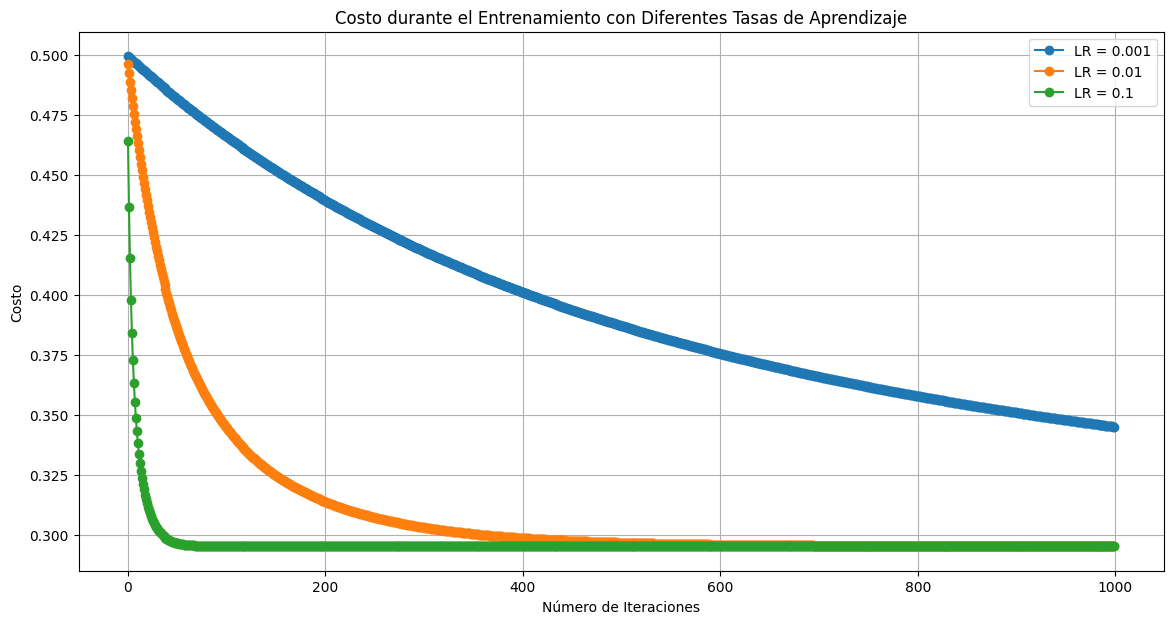

In [339]:
# Probar Diferentes Tasas de Aprendizaje
learning_rates = [0.001, 0.01, 0.1]
iterations = 1000

results = []
# Lista para guardar los costos para cada tasa de aprendizaje

costs = []  
for lr in learning_rates:
    print(f"\nProbando tasa de aprendizaje: {lr}")
    
    # Inicializar parámetros
    W = np.zeros(X.shape[1])
    b = 0
    
    # Entrenar el modelo
    W, b, cost_list = gradient_descent(X, Y, W, b, lr, iterations)
    
    # Guardar los costos
    costs.append(cost_list)
    
    # Calcular el costo final
    final_cost = cost_list[-1]
    
    # Calcular las predicciones
    y_pred = np.dot(X, W) + b
    
    # quitar la normalización para la variable objetivo
    y_pred = y_pred * Y_std + Y_mean

    # Calcular el RMSE
    def rmse(y_true, y_pred):
        return np.sqrt(np.mean((y_true - y_pred) ** 2))

    error = rmse(data['Calificacion en IMDB'], y_pred)
    
    # Guardar los resultados
    results.append({
        'Learning Rate': lr,
        'Final Cost': final_cost,
        'RMSE': error
    })

# Crear un DataFrame con los resultados
results_df = pd.DataFrame(results)
print("\nResultados de las pruebas con diferentes tasas de aprendizaje:")
print(results_df)

# Graficar el costo a lo largo de las iteraciones para cada tasa de aprendizaje
plt.figure(figsize=(14, 7))

for idx, lr in enumerate(learning_rates):
    plt.plot(costs[idx], label=f'LR = {lr}', linestyle='-', marker='o')

plt.xlabel('Número de Iteraciones')
plt.ylabel('Costo')
plt.title('Costo durante el Entrenamiento con Diferentes Tasas de Aprendizaje')
plt.legend()
plt.grid(True)
plt.show()